# Figure of station profile model evaluation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import pandas as pd 
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import pickle
from datetime import date

%matplotlib notebook

In [3]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar
import seaborn as sns

###### Parameters:

In [4]:
# domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

# results to plot:
year=2015
month   = 8
folder1 = '/data/brogalla/run_storage/Mn-set4-202004/ref-2015/'
folder2 = '/data/brogalla/run_storage/Mn-tuning-202012/ref-2015-tuning5/'

# colours:
c_continent    = '#ce9169'
c_glacier      = '#36ab92'
c_other        = '#a6a6a6'
land_color     = "#8b7765"
profile_colors = ['#e54141', '#33c7ff']

##### Load files:

In [5]:
def load_results(folder, file):
    Mn_model = nc.Dataset(folder+file)
    mn_dis   = np.array(Mn_model.variables['dissolmn'])
    return mn_dis

Model results

In [11]:
Mn_model1 = nc.Dataset(folder1+'ANHA12_EXH006_2015_monthly.nc')
lon_model    = np.array(Mn_model1.variables['nav_lon'])
lat_model    = np.array(Mn_model1.variables['nav_lat'])
depths_model = np.array(Mn_model1.variables['deptht'])

In [12]:
file1 = 'ANHA12_EXH006_'+str(year)+'_monthly.nc'
file2 = 'ANHA12_EXH006_'+str(year)+'_monthly.nc'
mn_dis1      = load_results(folder1, file1)
mn_dis2      = load_results(folder2, file2)

Meshes

In [13]:
mesh       = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

In [14]:
mask     = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh_zgr10.nc')
tmask    = mask.variables['tmask']
tmask    = np.array(tmask[0,:,:,:])
mlons    = np.array(mask.variables['nav_lon'])
mlats    = np.array(mask.variables['nav_lat'])
Z_masked = np.ma.masked_where((tmask > 0.1), tmask) 

Observations

In [15]:
Mn_data  = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

dMn_BB1  = Mn_data['BB1'].dropna()[1:].astype('float'); dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float');
dMn_BB3  = Mn_data['BB3'].dropna()[1:].astype('float'); dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float');
dMn_CB2  = Mn_data['CB2'].dropna()[1:].astype('float'); dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float');
dMn_CB4  = Mn_data['CB4'].dropna()[1:].astype('float'); dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float');
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float'); dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float');
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float'); dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float');
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float'); dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float');
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float'); dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float');

std_BB1  = Mn_data['Unnamed: 8'].dropna()[1:].astype('float');  std_BB2 = Mn_data['Unnamed: 11'].dropna()[1:].astype('float');
std_BB3  = Mn_data['Unnamed: 14'].dropna()[1:].astype('float'); std_CB1 = Mn_data['Unnamed: 44'][1:].astype('float').fillna(0)[0:11];
std_CB2  = Mn_data['Unnamed: 47'].dropna()[1:].astype('float'); std_CB3 = Mn_data['Unnamed: 50'][1:].astype('float').fillna(0)[0:22];
std_CB4  = Mn_data['Unnamed: 53'].dropna()[1:].astype('float'); std_CAA1 = Mn_data['Unnamed: 17'].dropna()[1:].astype('float');
std_CAA2 = Mn_data['Unnamed: 20'].dropna()[1:].astype('float'); std_CAA3 = Mn_data['Unnamed: 23'].dropna()[1:].astype('float');
std_CAA4 = Mn_data['Unnamed: 26'].dropna()[1:].astype('float'); std_CAA5 = Mn_data['Unnamed: 29'].dropna()[1:].astype('float');
std_CAA6 = Mn_data['Unnamed: 32'].dropna()[1:].astype('float'); std_CAA7 = Mn_data['Unnamed: 35'].dropna()[1:].astype('float');
std_CAA8 = Mn_data['Unnamed: 38'].dropna()[1:].astype('float'); std_CAA9 = Mn_data['Unnamed: 41'].dropna()[1:].astype('float');

depth_BB1  = Mn_data['Depth.2'].dropna(); depth_BB2 = Mn_data['Depth.3'].dropna();
depth_BB3  = Mn_data['Depth.4'].dropna(); depth_CB1 = Mn_data['Depth.14'].dropna();
depth_CB2  = Mn_data['Depth.15'].dropna(); depth_CB3 = Mn_data['Depth.16'].dropna();
depth_CB4  = Mn_data['Depth.17'].dropna(); depth_CAA1 = Mn_data['Depth.5'].dropna();
depth_CAA2 = Mn_data['Depth.6'].dropna(); depth_CAA3 = Mn_data['Depth.7'].dropna();
depth_CAA4 = Mn_data['Depth.8'].dropna(); depth_CAA5 = Mn_data['Depth.9'].dropna();
depth_CAA6 = Mn_data['Depth.10'].dropna(); depth_CAA7 = Mn_data['Depth.11'].dropna();
depth_CAA8 = Mn_data['Depth.12'].dropna(); depth_CAA9 = Mn_data['Depth.13'].dropna();

In [16]:
bottom_depths =[np.amax(d) for d in [depth_CAA1, depth_CAA2, depth_CAA3, depth_CAA4, depth_CAA5, depth_CAA6, \
                            depth_CAA7, depth_CAA8, depth_CAA9, depth_CB1, depth_CB2, depth_CB3, depth_CB4]]

In [17]:
Pb_data   = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons      = Pb_data['station lon'].astype('float').dropna().values
lats      = Pb_data['Station lat'].astype('float').dropna().values

##### Define functions

In [18]:
def find_index_ANHA12_full(transect_lons, transect_lats, ANHA12_lon=mesh_lon, ANHA12_lat=mesh_lat):
    # input:   ANHA12_lon, ANHA12_lat       --- 2400x1632 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12_lon, ANHA12_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12_lon, ANHA12_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

In [19]:
def find_index_ANHA12_sub(transect_lons, transect_lats, ANHA12sub_lon=lon_model, ANHA12sub_lat=lat_model):
    # input:   ANHA12sub_lon, ANHA12sub_lat --- 570x600 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12sub_lon, ANHA12sub_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12sub_lon, ANHA12sub_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

In [20]:
def station_profile(ax, dMn, stn_depths, stn_std, name, month, \
                    lons=lons, lats=lats, stn_names=stn_names, depths_model=depths_model,zoom=False):
    
    ax.invert_yaxis()
   
    # observations: -------------------------------------------------------------------------------------------
    dMn_obs   = np.array(dMn)
    depth_obs = np.array(stn_depths)
    ax.scatter(dMn_obs, depth_obs, zorder=4, edgecolors='k', color=profile_colors[0], s=14, linewidth=0.7)
#     ax.fill_betweenx(depth_obs, dMn_obs-stn_std, dMn_obs+stn_std, zorder=3, color=profile_colors[0])

    # model: --------------------------------------------------------------------------------------------------
    lon_station = lons[stn_names==name]
    lat_station = lats[stn_names==name]
    model_stni, model_stnj = find_index_ANHA12_sub(lon_station, lat_station)
    model_i, model_j = find_index_ANHA12_full(lon_station, lat_station)
    model_i = int(model_i); model_j = int(model_j);
    model_stni = int(model_stni); model_stnj = int(model_stnj);

    mn_ij1 = mn_dis1[month, 0, :, model_stni, model_stnj]*10**9
    mn_ij2 = mn_dis2[month, 0, :, model_stni, model_stnj]*10**9
    mn_ij3 = mn_dis3[month, 0, :, model_stni, model_stnj]*10**9
    mn_ij4 = mn_dis4[month, 0, :, model_stni, model_stnj]*10**9
    mn_ij1_masked = np.ma.masked_where((tmask[:,model_i, model_j] < 0.1), mn_ij1)
    mn_ij2_masked = np.ma.masked_where((tmask[:,model_i, model_j] < 0.1), mn_ij2)
    mn_ij3_masked = np.ma.masked_where((tmask[:,model_i, model_j] < 0.1), mn_ij3)
    mn_ij4_masked = np.ma.masked_where((tmask[:,model_i, model_j] < 0.1), mn_ij4)
       
    # Run with sediment in sea ice:
#     ax.plot(mn_ij4_masked, depths_model, zorder=1, linestyle='-', linewidth=1.5, color='#7070ff')
#     ax.plot(mn_ij3_masked, depths_model, zorder=1, linestyle='-', linewidth=1.5, color='#bf3524')
    ax.plot(mn_ij2_masked, depths_model, zorder=1, linestyle='-', linewidth=2.5, color='#f09729')
    ax.plot(mn_ij1_masked, depths_model, zorder=1, linestyle='--', linewidth=1.5, color='k')
#     ax.scatter(mn_ij2_masked, depths_model, zorder=2, edgecolors='k', color=profile_colors[1], s=14, linewidth=0.7)
#     ax.scatter(mn_ij2_masked[0:20:4], depths_model[0:20:4], zorder=2, color=profile_colors[1], s=5)
        
    ax.set_ylim([depth_obs[-1]+20, -5])
#     ax.set_ylim(200,-5)
    ax.set_xlim([-2, 10])
    ax.xaxis.tick_top()    
    ax.xaxis.set_label_position('top') 
    ax.set_xticks([0,5,10,15])
    
#     Background patches behind profiles: ----------------------------------------------------------------------
    #top patch:
    x0_top     = -11
    y0_top     = -11 - 0.2*depth_obs[-1]
    width_top  = 15+12.5
    height_top = 0.2*depth_obs[-1]
    box_top    = mpl.patches.Rectangle((x0_top,y0_top), width_top, height_top, facecolor='w', clip_on=False, \
                                      alpha=0.8, zorder=1)
    ax.add_patch(box_top)
    
    #left side patch:
    x0_side     = -11
    y0_side     = -11
    width_side  = 15+12.5
    height_side = depth_obs[-1]+20+10+5
    box_side    = mpl.patches.Rectangle((x0_side,y0_side), width_side, height_side, \
                                        facecolor='w', clip_on=False, alpha=0.8, zorder=1)
    ax.add_patch(box_side)
    
    
    # add name of station to bottom right corner of each profile:
    bottom = depth_obs[-1]
    if name[0:2] == 'CB':
        ax.text(6, bottom-bottom*0.1, name, fontsize=7)
    elif name == 'CAA9':
        ax.text(5, bottom+10, name, fontsize=7)
    elif name == 'CAA6' or name == 'CAA5':
        ax.text(5, bottom-bottom*0.05, name, fontsize=7)
    elif name == 'CAA2':
        ax.text(4.5, bottom-bottom*0.09, name, fontsize=7)
    else:
        ax.text(4.5, bottom-bottom*0.08, name, fontsize=7)
    
    return

#### Figure:

<IPython.core.display.Javascript object>


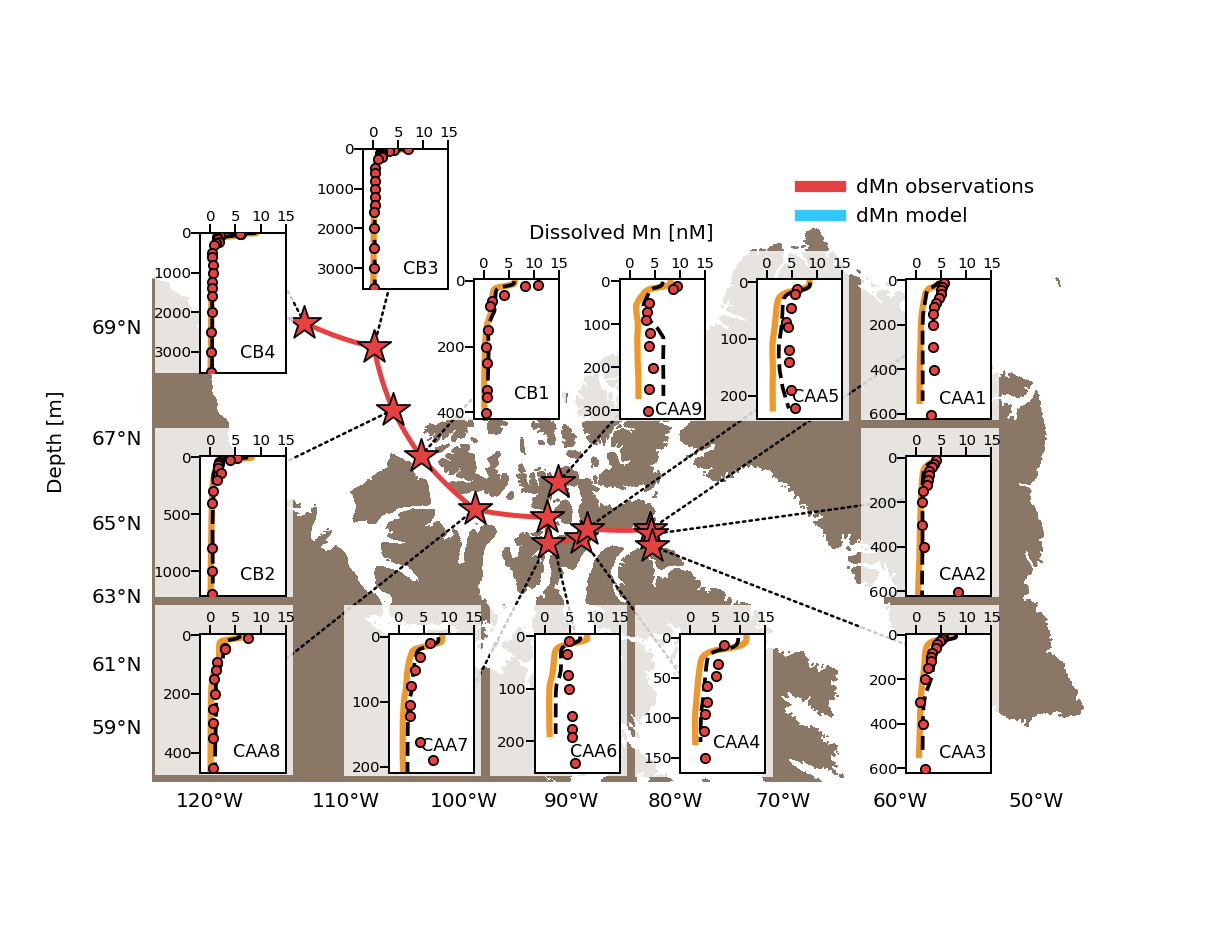

In [16]:
fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

# profile plots:
ax1 = plt.axes([0.746, 0.55, 0.07, 0.15])
ax2 = plt.axes([0.746, 0.36, 0.07, 0.15]) #CAA1
ax3 = plt.axes([0.746, 0.17, 0.07, 0.15]) 
ax4 = plt.axes([0.56, 0.17, 0.07, 0.15])
ax5 = plt.axes([0.623, 0.55, 0.07, 0.15])
ax6 = plt.axes([0.44, 0.17, 0.07, 0.15]) 
ax7 = plt.axes([0.32, 0.17, 0.07, 0.15])
ax8 = plt.axes([0.165, 0.17, 0.07, 0.15])
ax9 = plt.axes([0.51, 0.55, 0.07, 0.15])
ax10 = plt.axes([0.39,  0.55, 0.07, 0.15]) #CB1
ax11 = plt.axes([0.165, 0.36, 0.07, 0.15])
ax12 = plt.axes([0.299,  0.69, 0.07, 0.15])
ax13 = plt.axes([0.165, 0.60, 0.07, 0.15])

axes_list=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]

for axi in axes_list:
    axi.tick_params(labelsize=6, pad=0)
    
fig1 = station_profile(ax1, dMn_CAA1, depth_CAA1, std_CAA1, 'CAA1', month, zoom=False)
fig2 = station_profile(ax2, dMn_CAA2, depth_CAA2, std_CAA2, 'CAA2', month, zoom=False)
fig3 = station_profile(ax3, dMn_CAA3, depth_CAA3, std_CAA3, 'CAA3', month, zoom=False)
fig4 = station_profile(ax4, dMn_CAA4, depth_CAA4, std_CAA4, 'CAA4', month, zoom=False)
fig5 = station_profile(ax5, dMn_CAA5, depth_CAA5, std_CAA5, 'CAA5', month, zoom=False)
fig6 = station_profile(ax6, dMn_CAA6, depth_CAA6, std_CAA6, 'CAA6', month, zoom=False)
fig7 = station_profile(ax7, dMn_CAA7, depth_CAA7, std_CAA7, 'CAA7', month, zoom=False)
fig8 = station_profile(ax8, dMn_CAA8, depth_CAA8, std_CAA8, 'CAA8', month, zoom=False)
fig9 = station_profile(ax9, dMn_CAA9, depth_CAA9, std_CAA9, 'CAA9', month, zoom=False)
fig10 = station_profile(ax10, dMn_CB1, depth_CB1, std_CB1, 'CB1', month, zoom=False)
fig11 = station_profile(ax11, dMn_CB2, depth_CB2, std_CB2, 'CB2', month, zoom=False)
fig12 = station_profile(ax12, dMn_CB3, depth_CB3, std_CB3, 'CB3', month, zoom=False)
fig13 = station_profile(ax13, dMn_CB4, depth_CB4, std_CB4, 'CB4', month, zoom=False)

x_GEOTRACES, y_GEOTRACES = proj(lons[5:18], lats[5:18]) # leave out BB and K stations
ax.scatter(x_GEOTRACES, y_GEOTRACES, marker='*',s=200,zorder=5, edgecolor='k', linewidth=0.7, color=profile_colors[0])

# create lines connecting the profiles:
coordsA = "data"
coordsB = "data"
for i in range(len(stn_names[5:18])):
    xy1 = (x_GEOTRACES[i], y_GEOTRACES[i])
    xy2 = (10, 300/2)
    axB = axes_list[i]
    con = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax, axesB=axB, \
                          coordsA=coordsA, coordsB=coordsB, linestyle="dotted", linewidth=1.0, zorder=2)
    ax.add_artist(con)
    
    
ax.plot(0.8, 0.8, linewidth=4.5, color=profile_colors[0], label="dMn observations")
ax.plot(0.8, 0.8, linewidth=4.5, color=profile_colors[1], label="dMn model")
ax.set_frame_on(False)

ax.legend(loc=(0.68, 0.88), fontsize=8, frameon=False)

ax.text(1.8e6, 2.6e6, 'Dissolved Mn [nM]', fontsize=8)
ax.text(-0.5e6, 1.4e6, 'Depth [m]', fontsize=8, rotation=90)

figure = plt.gcf()
figure.set_size_inches(4.5*1.5, 3.7*1.4)

# Scatter plots

In [21]:
dMn_obs = {'CAA1': dMn_CAA1, 'CAA2': dMn_CAA2, 'CAA3':dMn_CAA3, 'CAA4':dMn_CAA4, \
           'CAA5': dMn_CAA5, 'CAA6': dMn_CAA6, 'CAA7':dMn_CAA7, 'CAA8':dMn_CAA8, \
           'CAA9': dMn_CAA9, 'CB1' : dMn_CB1 , 'CB2' :dMn_CB2 , 'CB3' :dMn_CB3, \
           'CB4' :dMn_CB4}
dMn_depths = {'CAA1': depth_CAA1, 'CAA2': depth_CAA2, 'CAA3':depth_CAA3, 'CAA4':depth_CAA4, \
              'CAA5': depth_CAA5, 'CAA6': depth_CAA6, 'CAA7':depth_CAA7, 'CAA8':depth_CAA8, \
              'CAA9': depth_CAA9, 'CB1' : depth_CB1 , 'CB2' :depth_CB2 , 'CB3' :depth_CB3, \
              'CB4' :depth_CB4}

df_dMn_obs   = pd.DataFrame(data=dMn_obs)
df_depth_obs = pd.DataFrame(data=dMn_depths)

In [22]:
# For a single station:
def align_obs_mod(name, df_mn_obs, df_dep_obs, mn_modelled):
    
    # Find closest model point to observed station:
    lon_station = lons[stn_names==name]
    lat_station = lats[stn_names==name]
    model_stni, model_stnj = find_index_ANHA12_sub(lon_station, lat_station)
    model_i, model_j       = find_index_ANHA12_full(lon_station, lat_station)
    model_i    = int(model_i)   ; model_j = int(model_j);
    model_stni = int(model_stni); model_stnj = int(model_stnj);
    
    # Access modelled Mn values
    mn_model        = mn_modelled[8, 0, :, model_stni, model_stnj]*10**9
    mn_model_masked = np.ma.masked_where((tmask[:, model_i, model_j] < 0.1), mn_model)
    
    # Observed Mn values:
    mn_obs  = df_mn_obs[name].dropna()
    dep_obs = df_dep_obs[name].dropna()
    
    # Match closest model depth to observation depths:
    mn_mod = []
    for depth in dep_obs:
        d1 = np.argmin(np.abs(depths_model-depth))
        mn_mod.append(mn_model_masked[d1])
    
    return mn_mod, mn_obs

In [23]:
def align_all_stns(mn_dis):
    # input: dMn array from model experiment
    
    dMn_model        = np.empty((len(stn_names[5:]),25))
    dMn_observations = np.empty((len(stn_names[5:]),25))
    dMn_model[:] = np.nan
    dMn_observations[:] = np.nan
    
    i=0
    for stn in stn_names[5:]:
        mn_mstn, mn_ostn = align_obs_mod(stn, df_dMn_obs, df_depth_obs, mn_dis)
        dMn_model[i,0:len(mn_mstn)]        = mn_mstn
        dMn_observations[i,0:len(mn_ostn)] = mn_ostn.values
        i+=1
        
    aligned_model  = pd.DataFrame(data=dMn_model).transpose()
    aligned_observ = pd.DataFrame(data=dMn_observations).transpose()
    aligned_model.columns  = stn_names[5:].values
    aligned_observ.columns = stn_names[5:].values
    
    return aligned_model, aligned_observ

In [24]:
adMn_model_old, adMn_obs_old = align_all_stns(mn_dis1) # Old reference experiment
adMn_model_new, adMn_obs_new = align_all_stns(mn_dis2) # Tuning experiment #5

Available run sets:
- old reference run
- tuning1 --- up to spin-up4. Sed in ice = 0.015, resus = 1.0
- tuning2 --- up to spin-up7. Sed in ice = 0.030, resus = 1.0
- tuning3 --- up to spin-up7. Sed in ice = 0.015, resus = 2.0
- tuning4 --- up to spin-up5. Sed in ice = 0.030, resus = 4.0
- tuning5 --- up to 2015...... Sed in ice = 0.030, resus = 2.5

In [26]:
file = 'ANHA12_EXH006_2002_monthly.nc'
mn_dis_tuning1 = load_results('/data/brogalla/run_storage/Mn-tuning-202012/spin-up3-tuning1/', file)
mn_dis_tuning2 = load_results('/data/brogalla/run_storage/Mn-tuning-202012/spin-up7-tuning2/', file)
mn_dis_tuning3 = load_results('/data/brogalla/run_storage/Mn-tuning-202012/spin-up3-tuning3/', file)
mn_dis_tuning5 = load_results('/data/brogalla/run_storage/Mn-tuning-202012/spin-up7-tuning5/', file)

Isolate components:
- 0.015 --> 0.030 sediment in ice by: tuning3 - tuning1.
- 1.0 --> 4.0 resus by: tuning5 - tuning2

In [27]:
# Project the other tuning runs into 2015
# Mn change tuning 5 from 2015 --> spin-up7 + spin-up start
# project_2015_tuning2 = (mn_dis2 - mn_dis_tuning5) + mn_dis_tuning2
# project_2015_tuning3 = (mn_dis2 - mn_dis_tuning3) + mn_dis_tuning3

# Incremental addition by each component
sediment_ice_addition = (mn_dis_tuning3 - mn_dis_tuning1)/0.015
resuspension_addition = (mn_dis_tuning5 - mn_dis_tuning2)/1.5

In [55]:
tuning5_highresus = mn_dis2 + 5*resuspension_addition

In [56]:
adMn_model_upresus, adMn_obs_upresus = align_all_stns(tuning5_highresus) # higher resus

<IPython.core.display.Javascript object>


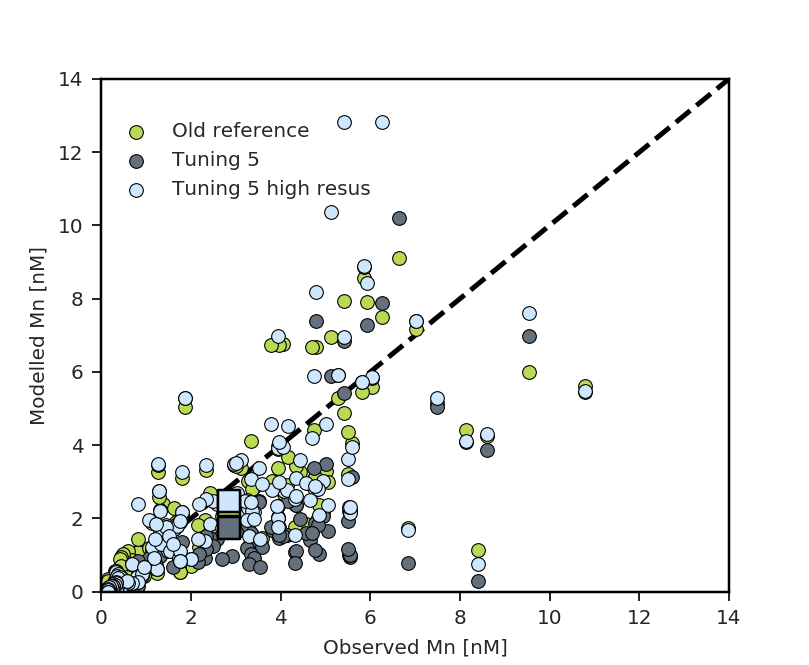

In [57]:
fig = plt.figure(figsize=(6,5))
st  = sns.axes_style("ticks")

# Colors:
rivers = '#bada55'
dirty  = '#64707b'
clean  = '#cee7fd'

with st:
    ax = sns.lineplot([0, 20],[0, 20], c='k', linewidth=2.0, zorder=1)
    ax.lines[0].set_linestyle('--')
    
    sns.scatterplot(adMn_obs_old.values.flatten(), adMn_model_old.values.flatten(), \
                    label=r'Old reference', s=30, edgecolor='k', color=rivers, zorder=2)
    sns.scatterplot(adMn_obs_new.values.flatten(), adMn_model_new.values.flatten(), \
                    label=r'Tuning 5', s=30, edgecolor='k', color=dirty, zorder=2)
    sns.scatterplot(adMn_obs_upresus.values.flatten(), adMn_model_upresus.values.flatten(), \
                    label=r'Tuning 5 high resus', s=30, edgecolor='k', color=clean, zorder=2)
    sns.scatterplot([np.nanmean(adMn_obs_old.values.flatten())], \
                    [np.nanmean(adMn_model_old.values.flatten())], \
                    s=80, linewidth=1.0, edgecolor='k', marker='s', color=rivers, zorder=3)
    sns.scatterplot([np.nanmean(adMn_obs_new.values.flatten())], \
                    [np.nanmean(adMn_model_new.values.flatten())], \
                    s=80, linewidth=1.0, edgecolor='k', marker='s', color=dirty, zorder=3)
    sns.scatterplot([np.nanmean(adMn_obs_upresus.values.flatten())], \
                    [np.nanmean(adMn_model_upresus.values.flatten())], \
                    s=80, linewidth=1.0, edgecolor='k', marker='s', color=clean, zorder=3)
    
    ax.set_xlabel('Observed Mn [nM]', fontsize=8)
    ax.set_ylabel('Modelled Mn [nM]',fontsize=8)
    ax.set(xlim=(0, 14.), ylim=(0, 14.))
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc=(0.01, 0.75), frameon=False, fontsize=8)
    
    ax.spines['left'].set_linewidth(1.0);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.0); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.0);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.0);    ax.spines['top'].set_color('black');    
    
figure = plt.gcf()
figure.set_size_inches(4.5, 3.7)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/R3-model-vs-observations-b.png', \
#                bbox_inches='tight', dpi=300, transparent=True)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/R3-model-vs-observations-b.svg', \
#                bbox_inches='tight', dpi=300, format='svg')